In [1]:
from math import atan2 , asin , cos , sin , sqrt , pi
import numpy as np
from math import atan2 , cos, sin, sqrt 
from scipy.integrate import odeint
import sys
import os
import gc
import matplotlib.pyplot as plt

In [ ]:
def simple_plot(X,xlabel,ylabel,dataset,aspect=False,dpi=200):

    # X = [ [t, x, label, color, marker, markersize, linestyle, linewidth], 
    #       [...] ]

    plt.rcParams['figure.dpi'] = dpi
    plt.rcParams['savefig.dpi'] = dpi

    fig, ax = plt.subplots(1)
    plt.style.use('seaborn-whitegrid')

    for i, data in enumerate(X):
        ax.plot(data[0], data[1], label=data[2], color=data[3], marker=data[4], markersize=data[5], linestyle=data[6], linewidth=data[7])

    if (aspect):
        ax.set_aspect('equal', 'box')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(dataset)
    
    return fig, ax


In [2]:
# define FOS and SOS classes
class FOS:
  # First order system
  # \frac{dy}{dt} = -\frac{1}{\tau} y + \frac{K}{\tau} u  
  def __init__(self, K, tau, x0):
    # K (DC gain) 
    # tau (time constant, time to reach 63.2% of the final symptotic value)    
    self.K_p = K
    self.tau_p = tau
    self.x = x0

  def run(self, u, dt):
    # callable(t, y, … ), y0, t, tfirst = True
    result  = odeint(lambda y, t: -1/self.tau_p*y + self.K_p*self.tau_p*u, self.x, [0, dt], tfirst = False)
    self.x = result[-1][0]
    return self.x

class SOS:
  # Second order system
  # \tau_s^2 \frac{d^2y}{dt^2} + 2 \zeta \tau \frac{dy}{dt} + y = K u 
  def __init__(self, K, tau, zeta, x0):
    # K (DC gain) 
    # tau (natural period of oscillations)
    # zeta (damping factor)
    self.K = K
    self.tau = tau
    self.zeta =  zeta
    self.x = x0

  def run(self, u, dt):
    # callable(t, y, … ), y0, t, tfirst = True
    result = odeint(lambda y, t: ( y[1], (-2.0*self.zeta*self.tau*y[1] - y[0] + self.K*u)/self.tau**2), self.x, [0, dt], tfirst = False)
    self.x = result[-1]
    return self.x[0]
  

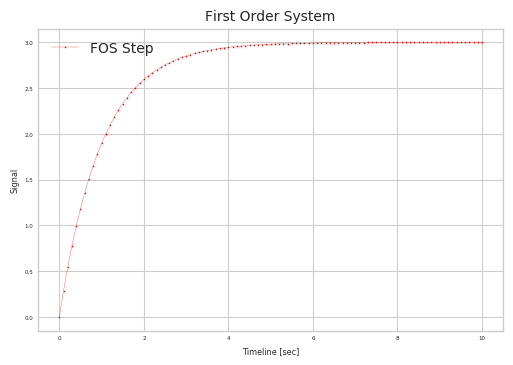

In [8]:
# test FOS
s1 = FOS(3,1,0)
t = [0.0]
y = [s1.x]

dt = 0.1 # seconds 
T = 10.0 # seconds 
for k in range(int(T/dt)): # seconds
  t.append((k+1.0)*dt)
  y.append(s1.run(1, dt))

fig, ax = simple_plot( 
 [  
  [ t, y, "FOS Step", "red", "x", 0.5, "solid", 0.2 ] 
 ],
"Timeline [sec]", "Signal", "First Order System", False, 100 )


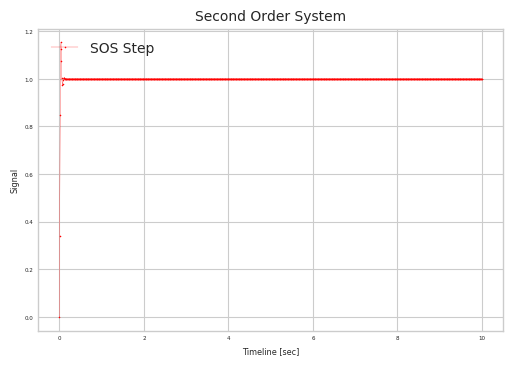

In [12]:
# test SOS
s2 = SOS(1,0.01,0.5,[0,0])
t = [0.0]
y = [s2.x[0]]
dt = 0.01 # seconds
T = 10.0 # seconds 
for k in range(int(T/dt)): # seconds
  t.append((k+1)*dt)
  y.append(s2.run(1, dt))

fig, ax = simple_plot( 
 [  
  [ t, y, "SOS Step", "red", "x", 0.5, "solid", 0.2 ] 
 ],
"Timeline [sec]", "Signal", "Second Order System", False, 100 )